In [1]:
print ("hello world")

hello world


In [4]:
import numpy as np


In [5]:
import pandas as pd


In [6]:
import matplotlib.pyplot as mp

In [7]:
# Import data into Python environment.
df= pd.read_csv("/home/siddharth/Desktop/Telecom_complaints_data.csv")

In [8]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


In [38]:
# Provide the trend chart for the number of complaints at monthly and daily granularity levels.


In [10]:
df['Date']=pd.to_datetime(df['Date'])

In [11]:
df['Month']=df['Date'].dt.month_name()

In [12]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month
0,250635,Comcast Cable Internet Speeds,2015-04-22,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,April
1,223441,Payment disappear - service got disconnected,2015-04-08,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,April
2,242732,Speed and Service,2015-04-18,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,April
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-05-07,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,May
4,307175,Comcast not working and no service to boot,2015-05-26,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,May


In [13]:
daily= df["Date"].value_counts()
print(daily)

2015-06-24    218
2015-06-23    190
2015-06-25     98
2015-06-26     55
2015-06-30     53
             ... 
2015-05-10      7
2015-05-24      7
2015-04-05      6
2015-04-11      5
2015-05-03      5
Name: Date, Length: 91, dtype: int64


In [14]:
dates=df.groupby('Date').count()["Ticket #"]

In [15]:
daily_rate=pd.DataFrame(dates).reset_index()
daily_rate.head()

,Date,Ticket #
0,2015-04-01,18
1,2015-04-02,27
2,2015-04-03,15
3,2015-04-04,12
4,2015-04-05,6


In [16]:
months=df.groupby("Month").count()["Ticket #"]
monthly_rate=pd.DataFrame(months).reset_index()
monthly_rate.head() 

,Month,Ticket #
0,April,545
1,June,1280
2,May,399


<AxesSubplot:title={'center':'MONTHLY RATE OF COMPLAINTS'}, xlabel='Month'>

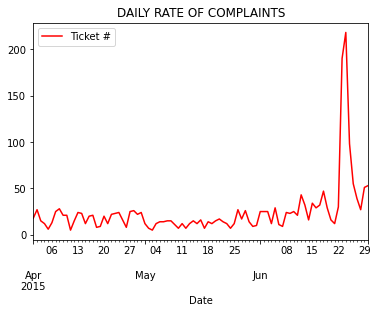

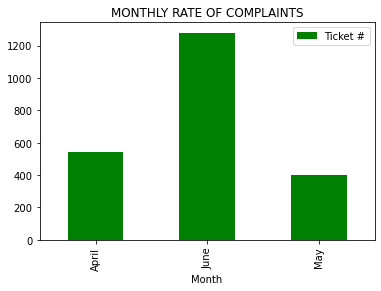

In [17]:
daily_rate.plot(x= "Date", y="Ticket #", color="r", kind="line", title="DAILY RATE OF COMPLAINTS" )
monthly_rate.plot(x= "Month", y="Ticket #", color="g", kind="bar", title="MONTHLY RATE OF COMPLAINTS")



In [18]:
#Which complaint types are maximum i.e., around internet, network issues, or across any other domains.
df["Customer Complaint"].unique()
df["Customer Complaint"]=df['Customer Complaint'].apply(lambda x: str(x).lower())


,Frequency
comcast,102
comcast data cap,30
comcast internet,29
comcast data caps,21
comcast billing,18


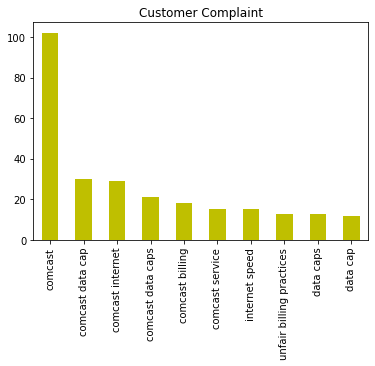

In [203]:
df['Customer Complaint'].value_counts()[:10].plot.bar(title= "Customer Complaint", color="y")
frequency={"Frequency":df["Customer Complaint"].value_counts()}
frequency= pd.DataFrame(frequency)
frequency.head()


In [ ]:
#- Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.

In [20]:
df["Status"].unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

In [163]:
df["New_Status"]= ["Closed" if st=="Closed" or st=="Solved" else "Open" for st in df["Status"]]

In [164]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month,New_Status
0,250635,comcast cable internet speeds,2015-04-22,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,April,Closed
1,223441,payment disappear - service got disconnected,2015-04-08,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,April,Closed
2,242732,speed and service,2015-04-18,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,April,Closed
3,277946,comcast imposed a new usage cap of 300gb that ...,2015-05-07,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,May,Open
4,307175,comcast not working and no service to boot,2015-05-26,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,May,Closed


In [23]:
# Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:

State_complaints=df.groupby(["State","New_Status"]).size().unstack().fillna(0)

In [24]:
State_complaints

New_Status,CLOSED,PENDING
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,0.0
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District Of Columbia,14.0,2.0
District of Columbia,1.0,0.0


<AxesSubplot:xlabel='State'>

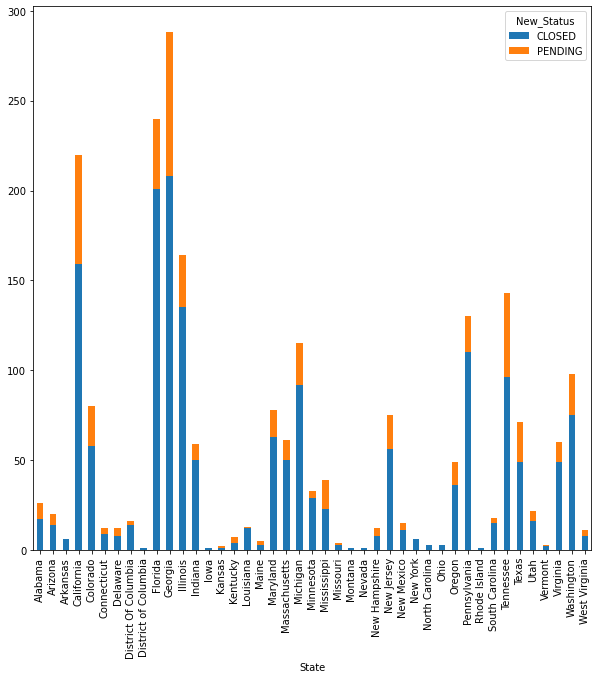

In [25]:
State_complaints.plot.bar(stacked=True, figsize= (10,10) )

In [26]:
#Which state has the maximum complaints
"From above graph georgia has the highest number of complains"
df.groupby(["State"]).size().sort_values(ascending=False)


State
Georgia                 288
Florida                 240
California              220
Illinois                164
Tennessee               143
Pennsylvania            130
Michigan                115
Washington               98
Colorado                 80
Maryland                 78
New Jersey               75
Texas                    71
Massachusetts            61
Virginia                 60
Indiana                  59
Oregon                   49
Mississippi              39
Minnesota                33
Alabama                  26
Utah                     22
Arizona                  20
South Carolina           18
District Of Columbia     16
New Mexico               15
Louisiana                13
Connecticut              12
New Hampshire            12
Delaware                 12
West Virginia            11
Kentucky                  7
Arkansas                  6
New York                  6
Maine                     5
Missouri                  4
North Carolina            3
Vermont       

In [165]:
# Which state has the highest percentage of unresolved complaints
unresolved=df.groupby(["State", "New_Status"]).size().unstack().fillna(0).sort_values(by="Open",ascending=False)
unresolved

New_Status,Closed,Open
State,,
Georgia,208.0,80.0
California,159.0,61.0
Tennessee,96.0,47.0
Florida,201.0,39.0
Illinois,135.0,29.0
Washington,75.0,23.0
Michigan,92.0,23.0
Colorado,58.0,22.0
Texas,49.0,22.0


unresolved["unresolved_data_pct"]=unresolved["Open"]/(unresolved["Open"]+unresolved["Closed"])*100
unresolved

In [215]:
# Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.
total=df.groupby(["Received Via", "New_Status"]).size().unstack()

total["TOTAL"]=(total.iat[0,0]+total.iat[0,1], total.iat[1,0]+ total.iat[1,1])
total["TOT_PERCENTAGE"]= (total.iat[0,2]/total["TOTAL"].sum()*100, total.iat[1,2]/total["TOTAL"].sum()*100)

total["resolved_pct"]=total["Closed"]/total["TOTAL"]*100 
total["total_resolved"]= total["Closed"].sum()/total["TOTAL"].sum()*100

total



New_Status,Closed,Open,TOTAL,TOT_PERCENTAGE,resolved_pct,total_resolved
Received Via,,,,,,
Customer Care Call,864,255,1119,50.314748,77.211796,76.753597
Internet,843,262,1105,49.685252,76.289593,76.753597
